# Lending Club Case Study

## Overview:

### Lending Club is a Marketplace for personal loans that matches borrowers who are seeking loan with investors looking to lend money and make a return.

* When the Borrower applies for loan to the Lending Club, Lending club has the authority to accept or reject the loan application based on the risk factors.
* There are two types of risks that could be observed - Default and Non-Default Risks.
* Default Risk: where customer fails to pay the instalments of the loan and suffers charged off. Such customer is treated as the bad customer.
* Non-default Risk: where the customer pays the installments regularly or with some delinquency.

## Objective of the Case Study:
* Understanding the Data set and analyzing the possible risks that may occur when the loan is provided to the Customer based on various driving factors.
* Data Cleaning - Removal of missing values and redundant values.
* Data Analysis - Identifying the risky applicants, comaprision and visualization of data with various other parameters.
* Recommendations

## Data Sourcing and Understanding:

### Importing the libraries:

In [1]:
import numpy as np                                
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing the Dataset file:

In [2]:
loan_dataset = pd.read_csv(r"C:\Users\Suhas Satheesh\Desktop\CaseStudy\loan.csv", dtype = object)
#Considering the datatype as object

In [5]:
# Reading first 10 rows of data set
loan_dataset.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


### Data Understanding:

In [7]:
# Information about the Dataset
loan_dataset.info

<bound method DataFrame.info of             id member_id loan_amnt funded_amnt funded_amnt_inv        term  \
0      1077501   1296599      5000        5000            4975   36 months   
1      1077430   1314167      2500        2500            2500   60 months   
2      1077175   1313524      2400        2400            2400   36 months   
3      1076863   1277178     10000       10000           10000   36 months   
4      1075358   1311748      3000        3000            3000   60 months   
...        ...       ...       ...         ...             ...         ...   
39712    92187     92174      2500        2500            1075   36 months   
39713    90665     90607      8500        8500             875   36 months   
39714    90395     90390      5000        5000            1325   36 months   
39715    90376     89243      5000        5000             650   36 months   
39716    87023     86999      7500        7500             800   36 months   

      int_rate installment grad

In [8]:
# Shape of the Dataset
loan_dataset.shape

(39717, 111)

In [7]:
# There are 39717 rows and 111 columns in the dataset

In [9]:
# Checking the Data types of Loan Dataset
loan_dataset.dtypes

id                            object
member_id                     object
loan_amnt                     object
funded_amnt                   object
funded_amnt_inv               object
                               ...  
tax_liens                     object
tot_hi_cred_lim               object
total_bal_ex_mort             object
total_bc_limit                object
total_il_high_credit_limit    object
Length: 111, dtype: object

### Cleaning Datasets:

In [10]:
#Identifying the missing values
loan_dataset.isnull()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
39713,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
39714,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
39715,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [11]:
#Summing up all the missing values row-wise
loan_dataset.isnull().all(axis=1).sum()

0

In [11]:
#There are no empty rows in the dataset

In [12]:
#Summing up all the missing values column-wise
loan_dataset.isnull().all(axis=0).sum()

54

In [13]:
#There are 54 columns having missing values

In [13]:
#Summing up all the missing values
loan_dataset.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [14]:
#Checking the Columns present in the dataset
loan_dataset.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [15]:
#Dropping all the columns having null values
loan_dataset.drop(loan_dataset.iloc[:, 53:105], inplace = True, axis = 1) 

In [16]:
loan_dataset.shape

(39717, 59)

In [18]:
#There are 59 columns after removing columns having null values

In [17]:
#Checking for any duplicates based on 'id' column
print(loan_dataset.duplicated(subset=None, keep='first').count())
dup=loan_dataset[loan_dataset.duplicated(['id'])]

39717


In [20]:
#As we could observe, there are no duplicate rows present

In [18]:
#Finding the percentage of missing values column-wise
perc_missing = round(100*(loan_dataset.isnull().sum()/len(loan_dataset.index)),2)
print(perc_missing)

id                               0.00
member_id                        0.00
loan_amnt                        0.00
funded_amnt                      0.00
funded_amnt_inv                  0.00
term                             0.00
int_rate                         0.00
installment                      0.00
grade                            0.00
sub_grade                        0.00
emp_title                        6.19
emp_length                       2.71
home_ownership                   0.00
annual_inc                       0.00
verification_status              0.00
issue_d                          0.00
loan_status                      0.00
pymnt_plan                       0.00
url                              0.00
desc                            32.58
purpose                          0.00
title                            0.03
zip_code                         0.00
addr_state                       0.00
dti                              0.00
delinq_2yrs                      0.00
earliest_cr_

In [22]:
#Dropping Columns having missing values greater than 90%

In [19]:
columns_drop_list1 = ["tot_hi_cred_lim","total_bal_ex_mort","total_bc_limit","total_il_high_credit_limit","mths_since_last_major_derog","next_pymnt_d","mths_since_last_record"]
loan_dataset.drop(labels = columns_drop_list1, axis =1, inplace=True)

In [20]:
loan_dataset.shape

(39717, 52)

In [25]:
#There are some columns which seems to be unnecessary for the data analysis, so let's drop them

In [21]:
columns_drop_list2 = ["member_id","url","emp_title","zip_code","tax_liens","desc","mths_since_last_delinq"]
loan_dataset.drop(labels = columns_drop_list2, axis =1, inplace=True)

In [22]:
loan_dataset.shape

(39717, 45)

In [28]:
#Now we have 39717 rows and 45 columns after dropping the necessary columns

In [23]:
#Again Checking the percentage of missing values
perc_missing = round(100*(loan_dataset.isnull().sum()/len(loan_dataset.index)),2)
print(perc_missing)

id                            0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
purpose                       0.00
title                         0.03
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec                       0.00
revol_bal                     0.00
revol_util                    0.13
total_acc                     0.00
initial_list_status 

In [24]:
#It is observed that emp_length has 2.71% missing values, Let's drop them
loan_dataset=loan_dataset[~loan_dataset.emp_length.isnull()]

In [25]:
loan_dataset.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,pub_rec_bankruptcies
0,1077501,5000,5000,4975,36 months,10.65%,162.87,B,B2,10+ years,...,0,0,0,Jan-15,171.62,May-16,0,1,INDIVIDUAL,0
1,1077430,2500,2500,2500,60 months,15.27%,59.83,C,C4,< 1 year,...,0,117.08,1.11,Apr-13,119.66,Sep-13,0,1,INDIVIDUAL,0
2,1077175,2400,2400,2400,36 months,15.96%,84.33,C,C5,10+ years,...,0,0,0,Jun-14,649.91,May-16,0,1,INDIVIDUAL,0
3,1076863,10000,10000,10000,36 months,13.49%,339.31,C,C1,10+ years,...,16.97,0,0,Jan-15,357.48,Apr-16,0,1,INDIVIDUAL,0
4,1075358,3000,3000,3000,60 months,12.69%,67.79,B,B5,1 year,...,0,0,0,May-16,67.79,May-16,0,1,INDIVIDUAL,0


In [26]:
#There is a need to format emp_length column so as to include only numbers for better analysis
loan_dataset.emp_length.fillna('0',inplace=True)
loan_dataset['emp_length']=loan_dataset.emp_length.str.extract('(\d+)')
loan_dataset.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,pub_rec_bankruptcies
0,1077501,5000,5000,4975,36 months,10.65%,162.87,B,B2,10,...,0,0,0,Jan-15,171.62,May-16,0,1,INDIVIDUAL,0
1,1077430,2500,2500,2500,60 months,15.27%,59.83,C,C4,1,...,0,117.08,1.11,Apr-13,119.66,Sep-13,0,1,INDIVIDUAL,0
2,1077175,2400,2400,2400,36 months,15.96%,84.33,C,C5,10,...,0,0,0,Jun-14,649.91,May-16,0,1,INDIVIDUAL,0
3,1076863,10000,10000,10000,36 months,13.49%,339.31,C,C1,10,...,16.97,0,0,Jan-15,357.48,Apr-16,0,1,INDIVIDUAL,0
4,1075358,3000,3000,3000,60 months,12.69%,67.79,B,B5,1,...,0,0,0,May-16,67.79,May-16,0,1,INDIVIDUAL,0


In [27]:
#pub_rec_bankruptcies column also has 1.75% missing values which is equal to 697
loan_dataset.pub_rec_bankruptcies.isnull().sum()

697

In [28]:
#pub_rec_bankruptcies can be imputed with "Unknown" as the value for further analysis
loan_dataset.pub_rec_bankruptcies.fillna('Unknown',inplace=True)
loan_dataset.pub_rec_bankruptcies.isnull().sum()

0

#### pub_rec_bankruptcies has been cleaned

In [29]:
loan_dataset.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,pub_rec_bankruptcies
0,1077501,5000,5000,4975,36 months,10.65%,162.87,B,B2,10,...,0,0,0,Jan-15,171.62,May-16,0,1,INDIVIDUAL,0
1,1077430,2500,2500,2500,60 months,15.27%,59.83,C,C4,1,...,0,117.08,1.11,Apr-13,119.66,Sep-13,0,1,INDIVIDUAL,0
2,1077175,2400,2400,2400,36 months,15.96%,84.33,C,C5,10,...,0,0,0,Jun-14,649.91,May-16,0,1,INDIVIDUAL,0
3,1076863,10000,10000,10000,36 months,13.49%,339.31,C,C1,10,...,16.97,0,0,Jan-15,357.48,Apr-16,0,1,INDIVIDUAL,0
4,1075358,3000,3000,3000,60 months,12.69%,67.79,B,B5,1,...,0,0,0,May-16,67.79,May-16,0,1,INDIVIDUAL,0


#### From the dataset, it is observed that the int_rate and revol_util  are with '%' sign. It is necessary to remove '%' sign and include only numbers.

In [30]:
#Removing/Stripping '%' sign 
loan_dataset['int_rate'] = loan_dataset['int_rate'].str.rstrip('%')
loan_dataset['revol_util'] = loan_dataset['revol_util'].str.rstrip('%')

In [31]:
pd.set_option('display.max_columns', None)
loan_dataset.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,pub_rec_bankruptcies
0,1077501,5000,5000,4975,36 months,10.65,162.87,B,B2,10,RENT,24000,Verified,Dec-11,Fully Paid,n,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,May-16,0,1,INDIVIDUAL,0
1,1077430,2500,2500,2500,60 months,15.27,59.83,C,C4,1,RENT,30000,Source Verified,Dec-11,Charged Off,n,car,bike,GA,1,0,Apr-99,5,3,0,1687,9.40,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,0,1,INDIVIDUAL,0
2,1077175,2400,2400,2400,36 months,15.96,84.33,C,C5,10,RENT,12252,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,May-16,0,1,INDIVIDUAL,0
3,1076863,10000,10000,10000,36 months,13.49,339.31,C,C1,10,RENT,49200,Source Verified,Dec-11,Fully Paid,n,other,personel,CA,20,0,Feb-96,1,10,0,5598,21,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,Apr-16,0,1,INDIVIDUAL,0
4,1075358,3000,3000,3000,60 months,12.69,67.79,B,B5,1,RENT,80000,Source Verified,Dec-11,Current,n,other,Personal,OR,17.94,0,Jan-96,0,15,0,27783,53.90,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0,0,0,May-16,67.79,May-16,0,1,INDIVIDUAL,0


In [32]:
#From the dataset, we can derive separate columns for issue_d column separating month and year
loan_dataset.issue_d = pd.to_datetime(loan_dataset.issue_d, format='%b-%y')
loan_dataset['year']=loan_dataset['issue_d'].dt.year
loan_dataset['month']=loan_dataset['issue_d'].dt.month

In [30]:
loan_dataset.head() #Displaying the updated dataset

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,pub_rec_bankruptcies,year,month
0,1077501,5000,5000,4975,36 months,10.65,162.87,B,B2,10,RENT,24000,Verified,2011-12-01,Fully Paid,n,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,May-16,0,1,INDIVIDUAL,0,2011,12
1,1077430,2500,2500,2500,60 months,15.27,59.83,C,C4,1,RENT,30000,Source Verified,2011-12-01,Charged Off,n,car,bike,GA,1,0,Apr-99,5,3,0,1687,9.40,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,0,1,INDIVIDUAL,0,2011,12
2,1077175,2400,2400,2400,36 months,15.96,84.33,C,C5,10,RENT,12252,Not Verified,2011-12-01,Fully Paid,n,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,May-16,0,1,INDIVIDUAL,0,2011,12
3,1076863,10000,10000,10000,36 months,13.49,339.31,C,C1,10,RENT,49200,Source Verified,2011-12-01,Fully Paid,n,other,personel,CA,20,0,Feb-96,1,10,0,5598,21,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,Apr-16,0,1,INDIVIDUAL,0,2011,12
4,1075358,3000,3000,3000,60 months,12.69,67.79,B,B5,1,RENT,80000,Source Verified,2011-12-01,Current,n,other,Personal,OR,17.94,0,Jan-96,0,15,0,27783,53.90,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0,0,0,May-16,67.79,May-16,0,1,INDIVIDUAL,0,2011,12


In [33]:
loan_dataset.shape #Updated Rows and Columns size

(38642, 47)

## Data Analysis:
* For Data Analysis, let's begin in understanding the loan_status.
* loan_status is grouped as 'Fully Paid', 'Current' and 'Charged Off'.
* With 'Current' as the status, it is difficult to analyze the data and draw conclusion.
* Dropping 'Current' loan_status is preferred for efficient data analysis.

In [34]:
# Dropping 'Current' from loan_status column
loan_dataset = loan_dataset[loan_dataset['loan_status'] != "Current"]

In [35]:
loan_dataset.shape

(37544, 47)

In [43]:
# 'Current' loan_status has been successfully removed.

In [36]:
# For better analysis and finding some correlation is better to convert "amount" columns into numeric data.
# Listing the amount columns
amount_columns = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
#Converting the columns into numeric data
loan_dataset[amount_columns] = loan_dataset[amount_columns].apply(pd.to_numeric)

## Univariate Analysis:

### Analyzing the important variable loan_status in total loans issued:

In [37]:
# Finding the percentage of loan_status
perc_loan_status = (loan_dataset.loan_status.value_counts()*100)/len(loan_dataset)
print(perc_loan_status)

Fully Paid     85.61954
Charged Off    14.38046
Name: loan_status, dtype: float64


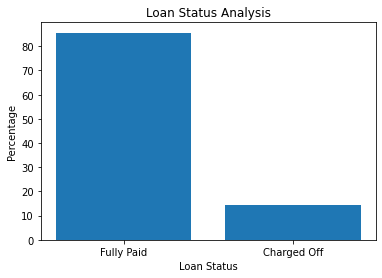

In [38]:
# Plotting bar graph for the analysis
loan_status = ['Fully Paid', 'Charged Off']
plt.bar(loan_status, perc_loan_status )
plt.title("Loan Status Analysis")
plt.xlabel('Loan Status')
plt.ylabel('Percentage')
plt.show()

### Observations:
* It is observed that the dataset shows 86% of Fully paid and 14% of Charged Off customers

### Analyzing the Purpose of Loan:

In [39]:
# Finding the percentages of loan purposes
perc_loan_purpose = (loan_dataset.purpose.value_counts()*100)/len(loan_dataset)
print(perc_loan_purpose)

debt_consolidation    47.078095
credit_card           13.048690
other                  9.889729
home_improvement       7.417963
major_purchase         5.540166
small_business         4.554656
car                    3.856808
wedding                2.431813
medical                1.747283
moving                 1.470275
house                  0.942894
vacation               0.926912
educational            0.844343
renewable_energy       0.250373
Name: purpose, dtype: float64


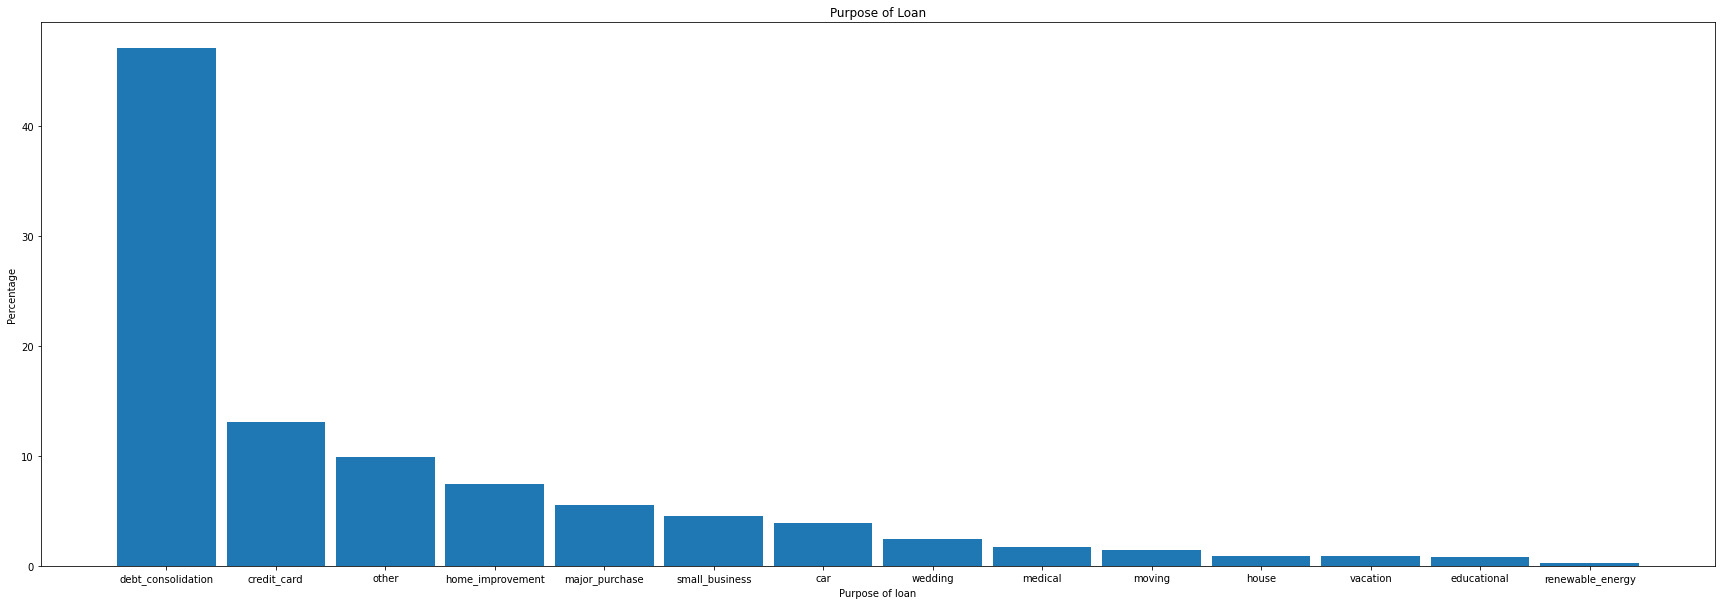

In [40]:
# Plotting bar graph for the analysis
plt.figure(figsize=[30, 10])
loan_purpose = ['debt_consolidation','credit_card', 'other', 'home_improvement', 'major_purchase', 'small_business', 'car', 'wedding', 'medical', 'moving', 'house', 'vacation', 'educational', 'renewable_energy']
plt.bar(loan_purpose, perc_loan_purpose, width= 0.9, align='center')
plt.title("Purpose of Loan")
plt.xlabel('Purpose of loan')
plt.ylabel('Percentage')
plt.show()

### Observations:
* Customers have lend their loans mostly for debt_consolidation(nearly 47%) and for credit_card(nearly 13%)

### Analysis of Loan Amount:

In [41]:
loan_dataset['loan_amnt'].describe()

count    37544.000000
mean     11119.329986
std       7354.098954
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

[Text(0.5, 1.0, 'Analysis of Loan Amount')]

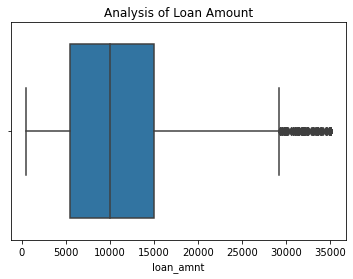

In [42]:
sns.boxplot(loan_dataset.loan_amnt).set(title = "Analysis of Loan Amount")

### Observation: 
The loan amount varies from 500 to 35000 with the mean of 10000.

In [43]:
loan_dataset.total_pymnt.describe()

count    37544.000000
mean     11957.010792
std       8823.936817
min          0.000000
25%       5565.271934
50%       9777.765034
75%      16243.811330
max      58563.679930
Name: total_pymnt, dtype: float64

<AxesSubplot:xlabel='total_pymnt'>

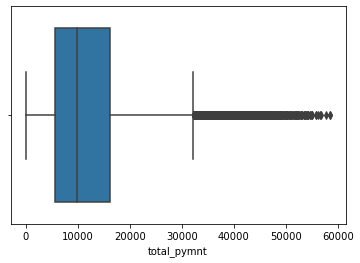

In [44]:
sns.boxplot(loan_dataset.total_pymnt)

### Removal of Outliners Quantile 0.99 from Annual Income for better analysis:

In [45]:
# Basic statistics with .describe() -Quantitative Variables

print('Before Removal of Outliers :\n')
print(loan_dataset['annual_inc'].describe())

# Data cleaning
# Remove Outliers quantile .99 from Annual Income
# it will make it easier to visualize the plots.

loan_dataset = loan_dataset[loan_dataset["annual_inc"] < loan_dataset["annual_inc"].quantile(0.99)]

print('After Removal of Outliers :')
print(loan_dataset["annual_inc"].describe())

# Now below data looks much better. Lets plot later and find some conclusions

Before Removal of Outliers :

count    3.754400e+04
mean     6.940708e+04
std      6.467698e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64
After Removal of Outliers :
count     37165.000000
mean      65903.070210
std       35153.363496
min        4000.000000
25%       40906.000000
50%       59000.000000
75%       81600.000000
max      234996.000000
Name: annual_inc, dtype: float64


Text(0.5, 0, 'Annual Income in lakhs')

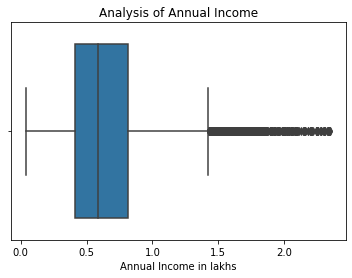

In [47]:
annual_lacs = loan_dataset.annual_inc/100000
plot = sns.boxplot(annual_lacs)
plot.set_title("Analysis of Annual Income")
plt.xlabel("Annual Income in lakhs")

### Analysis of Grades:


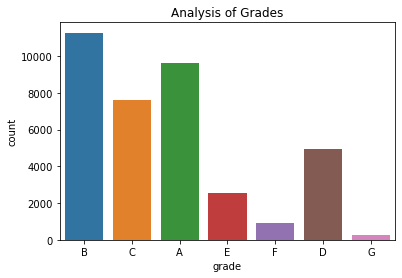

In [49]:
sns.countplot(x='grade', data=loan_dataset).set(title = "Analysis of Grades")
plt.show()

### Obesrvation:
Most of the loans have grade of A and B. Therefore stating most of the loans are high graded loans.

### Analysis of Employee Work Experience:

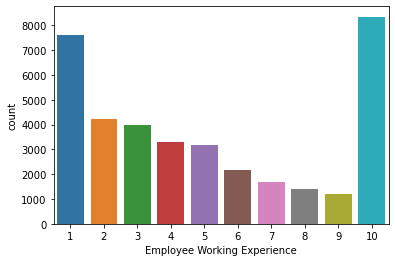

In [50]:
sns.countplot(x='emp_length', data=loan_dataset)
plt.xlabel('Employee Working Experience')
plt.show()

### Observation:
Most of the employees who have applied for loan have 10 years of work experience or nearly 1 year of work experience.


### Analysis of three loan amount fields:

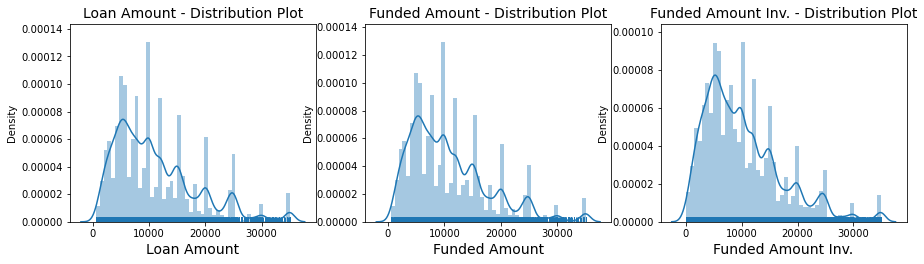

In [51]:
plt.figure(figsize=(15,8))
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.distplot(loan_dataset['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=14)
ax.set_xlabel('Loan Amount',fontsize=14)
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.distplot(loan_dataset['funded_amnt'],rug = True)
ax.set_title('Funded Amount - Distribution Plot',fontsize=14)
ax.set_xlabel('Funded Amount',fontsize=14)
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.distplot(loan_dataset['funded_amnt_inv'],rug = True)
ax.set_title('Funded Amount Inv. - Distribution Plot',fontsize=14)
ax.set_xlabel('Funded Amount Inv.',fontsize=14)
plt.show()

### Observation: 
Distribution of amounts for all three looks very much similar.
So loan amount column is considered for rest of our analysis.

### Analysis of Distribution of Loan Amount:

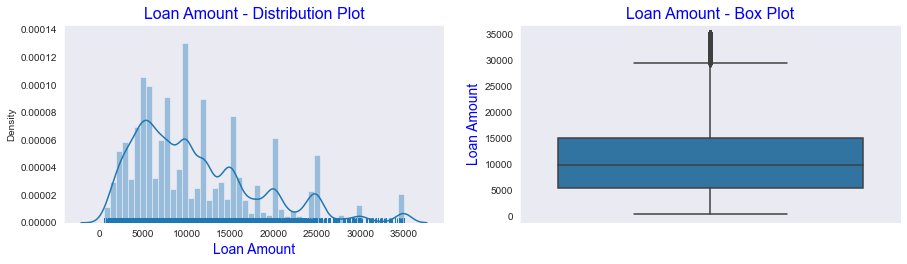

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8),facecolor='white')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan_dataset['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=16,color='b')
ax.set_xlabel('Loan Amount',fontsize=14,color='b')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan_dataset['loan_amnt'])
ax.set_title('Loan Amount - Box Plot',fontsize=16,color='b')
ax.set_ylabel('Loan Amount',fontsize=14,color='b')
plt.show()

### Observations :
Plots show that most of the Loan amounts are in range of 5000 - 15000.

### Analysis of Rate of Interest:

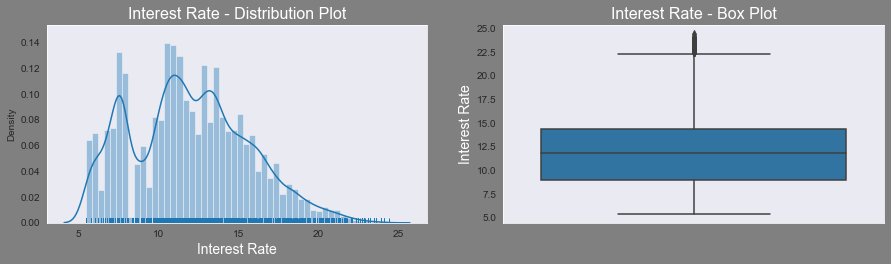

In [53]:
plt.figure(figsize=(15,8),facecolor='grey')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan_dataset['int_rate'],rug = True)
ax.set_title('Interest Rate - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan_dataset['int_rate'])
ax.set_title('Interest Rate - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color='w')
plt.show()


### Observation:
Interest Rates on loans are in range of approximately 8% - 15%.

## Segmented Univariate Analysis:

### Analysis of Loan Purpose with its status:

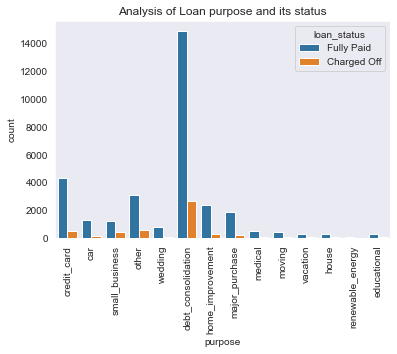

In [54]:
plot = sns.countplot(x='purpose', hue="loan_status", data=loan_dataset)
plt.xticks(rotation=90)
plot.set_title("Analysis of Loan purpose and its status")
plt.show()

### Observation:
* Majority of loan has been given for the debt consolidation and credit card purpose and has been fully paid.
* Charged off percentage is also high for debt consolidation.

### Analysis of Loan Amount with Loan Status:

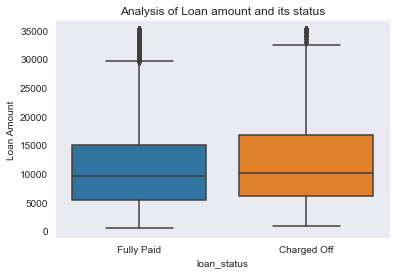

In [55]:
plot = sns.boxplot( y="loan_amnt", x='loan_status' , data=loan_dataset)
plt.ylabel('Loan Amount')
plot.set_title("Analysis of Loan amount and its status")
plt.show()

### Observation:
Mean, 25% and 75% Loan amount of Fully paid and charged off is exactly same.

### Analysis of Loan Status based on Home Ownership:

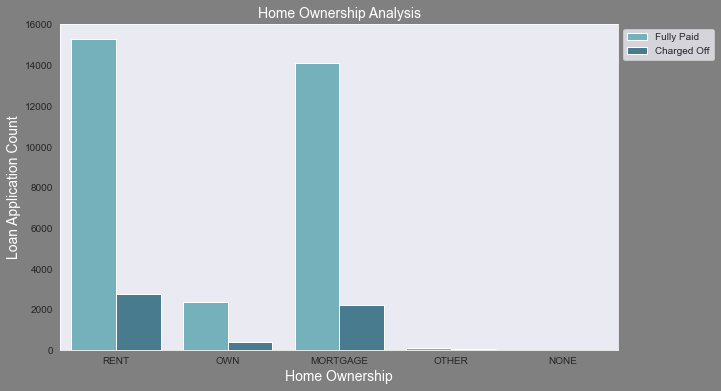

In [56]:
plt.figure(figsize=(10,6),facecolor='grey')
plot = sns.countplot(x="home_ownership",data=loan_dataset,hue='loan_status',palette='GnBu_d')
plot.legend(bbox_to_anchor=(1, 1))
plot.set_title('Home Ownership Analysis',fontsize=14,color='w')
plot.set_xlabel('Home Ownership',fontsize=14,color = 'w')
plot.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()


### Observations:
* The plot shows that most of them living in rented home or mortgazed their home.
* Applicant numbers are high from these categories so charged off is high too.


### Analysis based on the loan paying term:

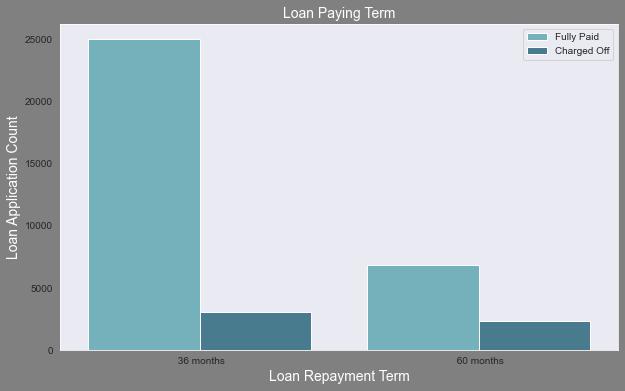

In [57]:
plt.figure(figsize=(10,6),facecolor='grey')
ax = sns.countplot(x="term",data=loan_dataset,hue='loan_status',palette='GnBu_d')
ax.set_title('Loan Paying Term',fontsize=14,color='w')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

### Observation:
Borrowers most likely to opt for 36 months term and have less chances to be defaulters/charged off compared to 60 months.


### Analysis of Number of Applications over the years:

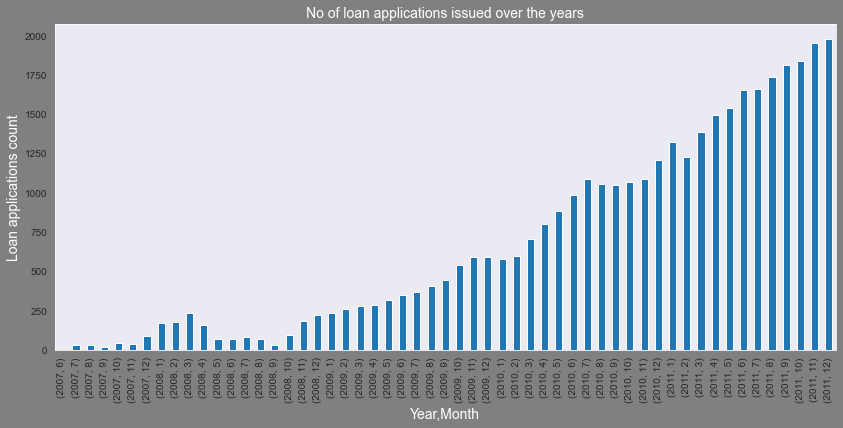

In [58]:
# Derived Column - Ordered Categorical Variables
# Let us look into number of loans which were approved every year/month
# Lets use derived column year to check pattern of loan issuing over the years.
plt.figure(figsize=(14,6),facecolor='grey')
loan_dataset.groupby(['year','month']).id.count().plot(kind='bar')
plt.ylabel('Loan applications count',fontsize=14,color='w')
plt.xlabel('Year,Month',fontsize=14,color = 'w')      
plt.title("No of loan applications issued over the years",fontsize=14,color='w')
plt.show()


### Observation: 
* Count of loan application is increasing every passing year.
* Increase in number of loan applications are adding more to number of charged off applications.
* number of loans issued in 2008( May-October) has lower rate of applications.

## Bivariate Analysis:

#### In Bivariate Analysis, categorizing the columns and creating bins would help in analyzing the dataset more efficiently.

In [163]:
# Categorizing loan amounts into bins.
loan_dataset['loan_amnt_category'] = pd.cut(loan_dataset['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# Categorizing annual incomes into bins.
loan_dataset['annual_inc_category'] = pd.cut(loan_dataset['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# Categorizing intrest rates into bins.
loan_dataset['int_rate_category'] = pd.cut(loan_dataset['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

# Categorizing dti into bins for bivariate analysis.
loan_dataset['dti_category'] = pd.cut(loan_dataset['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

In [71]:
loan_dataset.shape

(37165, 55)

In [72]:
loan_dataset.head(2)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,pub_rec_bankruptcies,year,month,loan_amnt_cats,annual_inc_cats,int_rate_cats,dti_cats,loan_amnt_category,annual_inc_category,int_rate_category,dti_category
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,May-16,0,1,INDIVIDUAL,0,2011,12,0-7000,20000-40000,10-13,NaN,0-7000,20000-40000,10-13,NaN
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,f,0,0,1008.710000,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,0,1,INDIVIDUAL,0,2011,12,0-7000,20000-40000,12.5-16,0-5,0-7000,20000-40000,12.5-16,0-5


### Analyzing Annual Income against Charged off Proportion:

In [85]:
# Grouping Annual Income Category with Loan Status
inc_range_vs_loan = loan_dataset.groupby(['annual_inc_category', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
# Analyzing Total as sum of Chargred Off and Fully paid (Note: Current loan status have been neglected)
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off']  + inc_range_vs_loan['Fully Paid'] 
# Calculation of Chargedoff Proportion for better understanding
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
# Rating the loan status in accordance with Charged off proportion
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,annual_inc_category,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,191,818,1009,0.189296
1,20000-40000,1421,6709,8130,0.174785
2,40000-60000,1675,9326,11001,0.152259
3,60000-80000,1002,6503,7505,0.133511
4,80000 +,1068,8452,9520,0.112185


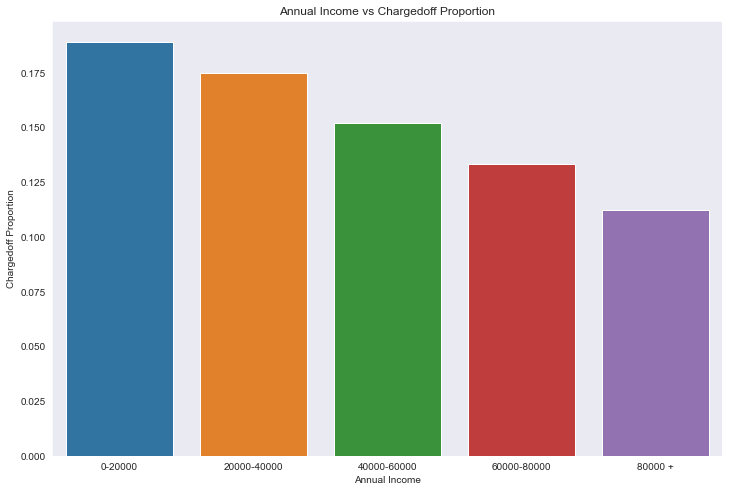

In [92]:
fig, plot = plt.subplots(figsize=(12, 8))
plot.set_title('Annual Income vs Chargedoff Proportion')
plot=sns.barplot(x='annual_inc_category', y='Chargedoff_Proportion', data=inc_range_vs_loan)
plot.set_ylabel('Chargedoff Proportion')
plot.set_xlabel('Annual Income')
plt.show()

### Observations:
* Income category of 80000+  has less chances of charged off.
* Income category of 0-20000 has high chances of charged off.
* With an increase in annual income, charged off proportion got decreased. 

### Analyzing the purpose of loan with charged off proportion:

In [97]:
# Grouping Annual Income Category with Loan Status
purpose_vs_loan = loan_dataset.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Fully Paid'] 
# Calculation of Charged off Proportion
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
# Rating the Loan status with respect to Charged off proportion
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,small_business,459,1221,1680,0.273214
10,renewable_energy,18,74,92,0.195652
5,house,58,286,344,0.168605
3,educational,51,264,315,0.161905
9,other,592,3088,3680,0.160870
7,medical,101,548,649,0.155624
8,moving,83,463,546,0.152015
2,debt_consolidation,2664,14875,17539,0.151890
12,vacation,50,298,348,0.143678
4,home_improvement,321,2386,2707,0.118581


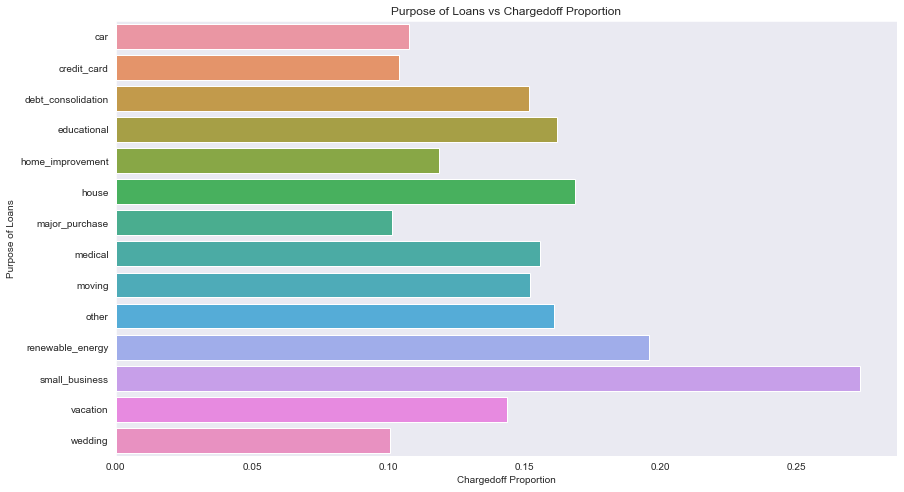

In [87]:
fig, plot = plt.subplots(figsize=(14, 8))
plot.set_title('Purpose of Loans vs Chargedoff Proportion')
plot=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=purpose_vs_loan)
plot.set_ylabel('Purpose of Loans')
plot.set_xlabel('Chargedoff Proportion')
plt.show()

### Observations:
* Small Business borrowers have high chances of getting charged off.
* Renewable Energy applicants are in second place of getting charged off.
* Applicants who borrow loan for wedding has least chances of getting charged off.

### Analyzing Sub-grades with Charged off Proportion:

In [100]:
# Grouping Subgrades with loan status
grade_vs_loan = loan_dataset.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Fully Paid'] 
# Calculation of Charged off proportion
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
# Rating the subgrades with respect to Charged off proportion
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=True)


loan_status,sub_grade,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,A1,24,1021,1045,0.022967
1,A2,68,1364,1432,0.047486
2,A3,90,1640,1730,0.052023
3,A4,168,2605,2773,0.060584
4,A5,207,2406,2613,0.079219
5,B1,153,1558,1711,0.089421
6,B2,208,1714,1922,0.108221
7,B3,321,2393,2714,0.118276
8,B4,317,2059,2376,0.133418
9,B5,346,2198,2544,0.136006


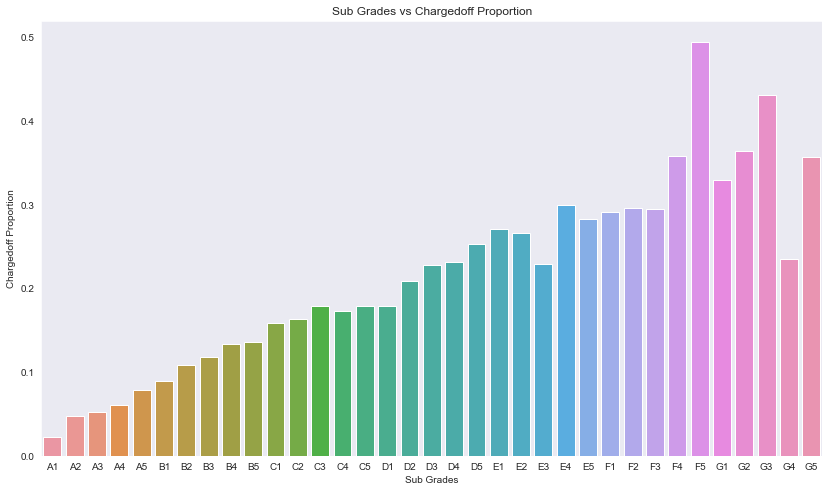

In [101]:
fig, plot = plt.subplots(figsize=(14, 8))
plot.set_title('Sub Grades vs Chargedoff Proportion')
plot=sns.barplot(x='sub_grade', y='Chargedoff_Proportion', data=grade_vs_loan)
plot.set_xlabel('Sub Grades')
plot.set_ylabel('Chargedoff Proportion')
plt.show()

### Observations:
* Sub Grade "F5" being the highest charged off category whereas "A1" being the least.
* Sub Grades of "A" has very less chances of charged off.
* Sub Grades of "F" and "G" have very high chances of charged off.
* Sub Grades of charged off is increasing with sub grades moving from sub grades of "A" towards sub grades of "G"


### Analyzing Interest Rates with Charged off proportion:

In [104]:
# Grouping Interest Rate Category with Loan Status
interest_vs_loan = loan_dataset.groupby(['int_rate_category', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off'] + interest_vs_loan['Fully Paid'] 
# Calculation Charged off
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
# Rating Interest Rate with Charged off proportion
interest_vs_loan.sort_values('Chargedoff_Proportion')

loan_status,int_rate_category,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0-10,758,10988,11746,0.064533
1,10-13,1177,7918,9095,0.129412
2,12.5-16,1923,9204,11127,0.172823
3,16 +,1214,3251,4465,0.271892


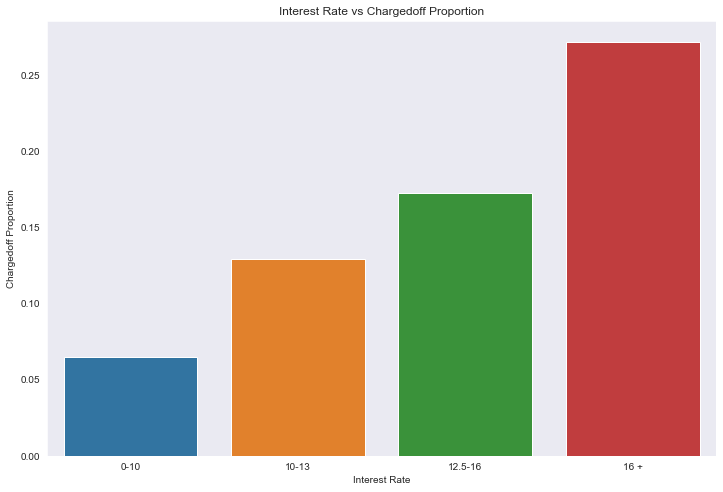

In [105]:
fig, plot = plt.subplots(figsize=(12, 8))
plot.set_title('Interest Rate vs Chargedoff Proportion')
plot=sns.barplot(x='int_rate_category', y='Chargedoff_Proportion', data=interest_vs_loan)
plot.set_xlabel('Interest Rate')
plot.set_ylabel('Chargedoff Proportion')
plt.show()

### Observations:
* Interest rate less than 10% has very less chances of charged off. Intrest rates are starting from minimin 5 %.
* Interest rate more than 16% has good chnaces of charged off as compared to other category intrest rates.
* Charged off proportion is increasing with higher intrest rates.

### Analyzing Verification Status with Charged off Proportion:

In [110]:
# Grouping Verification Status with Loan Status
verstatus_vs_loan = loan_dataset.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verstatus_vs_loan['Total'] = verstatus_vs_loan['Charged Off'] + verstatus_vs_loan['Fully Paid'] 
# Calculation of Charged off Proportion
verstatus_vs_loan['Chargedoff_Proportion'] = verstatus_vs_loan['Charged Off'] / verstatus_vs_loan['Total']
# Rating Verification status with respect to Charged off proportion
verstatus_vs_loan.sort_values('Chargedoff_Proportion')


loan_status,verification_status,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,Not Verified,2037,14153,16190,0.125818
1,Source Verified,1385,7992,9377,0.147702
2,Verified,1935,9663,11598,0.166839


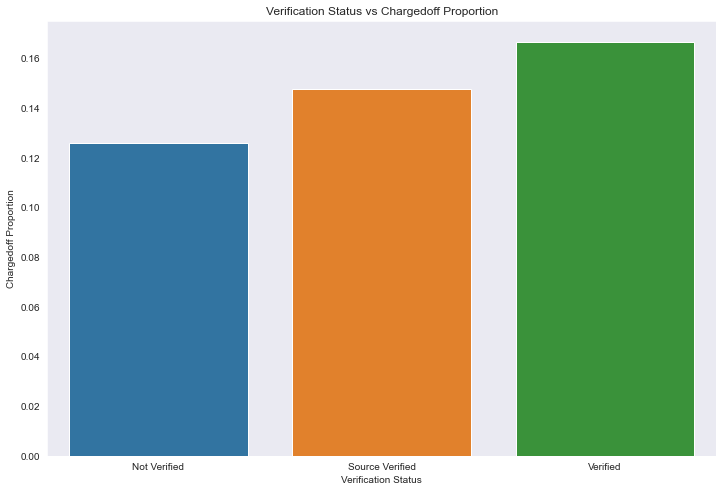

In [111]:
fig, plot = plt.subplots(figsize=(12, 8))
plot.set_title('Verification Status vs Chargedoff Proportion')
plot=sns.barplot(x='verification_status', y='Chargedoff_Proportion', data=verstatus_vs_loan)
plot.set_xlabel('Verification Status')
plot.set_ylabel('Chargedoff Proportion')
plt.show()

### Observations:
* "Verified" Status has more charged off ratio and "Not verified" being the least.
* But it is observed that there is no much difference in the charged off ratio among the three verification status. So, Verification status may not be considered as valid point for analysis.

### Analyzing Public Record Bankruptcies against Chargedoff Proportion:

In [113]:
# Grouping Public Record Bankrupticies with loan Status
bankruptcies_vs_loan = loan_dataset.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total']=bankruptcies_vs_loan['Charged Off'] +bankruptcies_vs_loan['Fully Paid'] 
bankruptcies_vs_loan['Chargedoff_Proportion'] = bankruptcies_vs_loan['Charged Off'] / bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('Chargedoff_Proportion')

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0,4905,30041,34946,0.140359
3,Unknown,116,572,688,0.168605
1,1,334,1192,1526,0.218873
2,2,2,3,5,0.400000


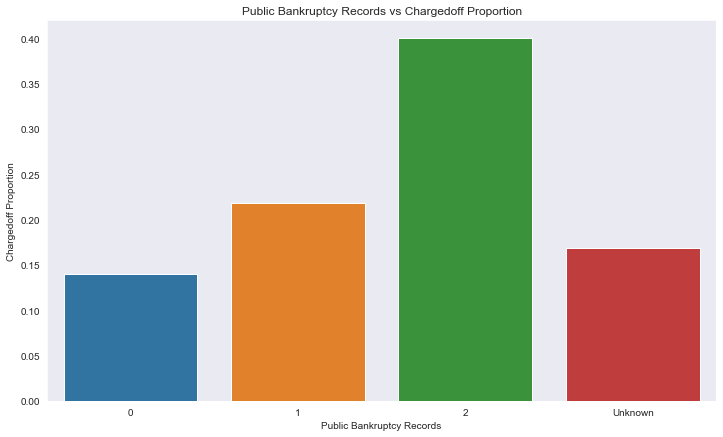

In [116]:
fig, plot = plt.subplots(figsize=(12, 7))
plot.set_title('Public Bankruptcy Records vs Chargedoff Proportion')
plot=sns.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Proportion', data=bankruptcies_vs_loan)
plot.set_xlabel('Public Bankruptcy Records')
plot.set_ylabel('Chargedoff Proportion')
plt.show()

### Observations:
* Those who already have pub_rec_bankruptcies value 1, have charged off proportion higher than who have no pub_rec_bankruptcies.
* pub_rec_bankruptcies count 2 has even higher charged off proportion but those numbers are not significant to decide.
* Unknown is the column for which we don't have any information abount borrower.
* This also makes sense that who has defaulted before has more chances of dafaulting in future as well.


### Analyzing Employment Length with respect to Charged off Ratio:

In [159]:
# Grouping Employment length with Charged off ratio
emplen_vs_loan = loan_dataset.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_vs_loan['Total'] = emplen_vs_loan['Charged Off'] + emplen_vs_loan['Fully Paid'] 
# Calculation of Charged off Ratio
emplen_vs_loan['Chargedoff_Proportion'] = emplen_vs_loan['Charged Off'] / emplen_vs_loan['Total']
# Rating of Employment Length with charged off ratio
emplen_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,emp_length,Charged Off,Fully Paid,Total,Chargedoff_Proportion
9,10,1316,7038,8354,0.157529
6,7,262,1435,1697,0.154390
4,5,456,2712,3168,0.143939
7,8,203,1216,1419,0.143058
0,1,1090,6533,7623,0.142988
5,6,305,1846,2151,0.141795
2,3,551,3426,3977,0.138547
3,4,456,2860,3316,0.137515
1,2,561,3684,4245,0.132155
8,9,157,1058,1215,0.129218


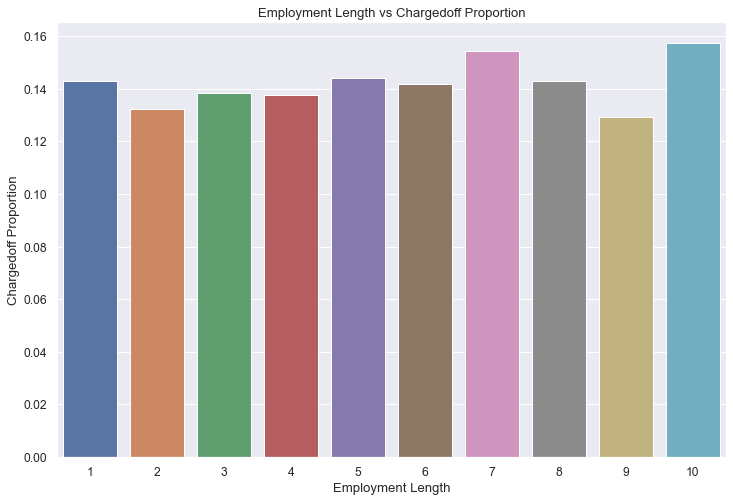

In [162]:
fig, plot = plt.subplots(figsize=(12, 8))
plot.set_title('Employment Length vs Chargedoff Proportion')
plot=sns.barplot(x='emp_length', y='Chargedoff_Proportion', data=emplen_vs_loan)
plot.set_xlabel('Employment Length')
plot.set_ylabel('Chargedoff Proportion')
plt.show()

### Observations:
* Borrowers who are not working or have less than 1 year of work experience have high chances of getting charged off.
* Probably borrowers with less or no experience they don't have source of income to repay loan.
* Rest of the applicants have more or less same chnaces of getting charged off.

### Analyzing Laon Amount with Interest Rate:

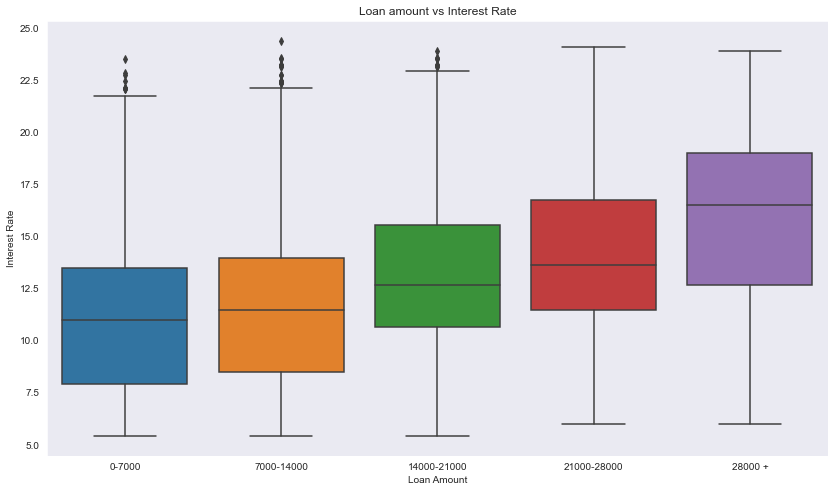

In [122]:
plt.figure(figsize=(14,8))
plot = sns.boxplot(y='int_rate', x='loan_amnt_cats', data =loan_dataset)
plot.set_title('Loan amount vs Interest Rate')
plot.set_ylabel('Interest Rate')
plot.set_xlabel('Loan Amount')
plt.show()

### Observation:
* The Interest Rate Increases with the loan amount.
* Probably for more loan amount, the term would be more and the interest rate as well varies accordingly.

### Analyzing the Purpose of loan with Interest Rate:

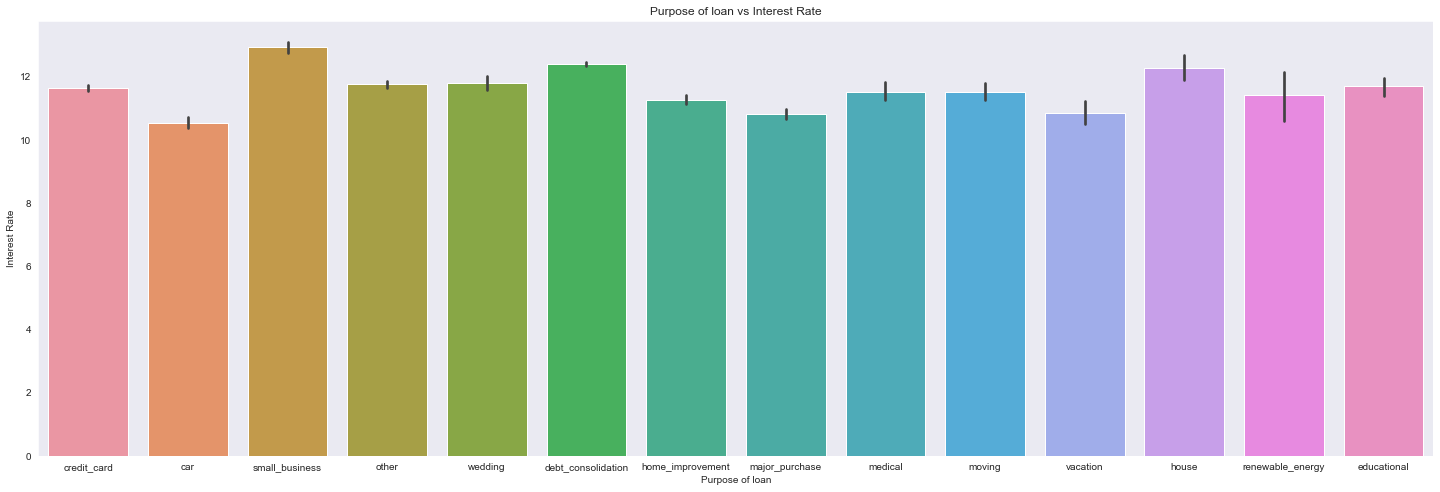

In [124]:
plt.figure(figsize=(25,8))
plot = sns.barplot(y='int_rate', x='purpose', data =loan_dataset)
plot.set_title('Purpose of loan vs Interest Rate')
plot.set_ylabel('Interest Rate')
plot.set_xlabel('Purpose of loan')
plt.show()

### Observation:
* Small Business applicants pay at a higher interest rate. Probably, they take a long term to pay the loan amount. The chances of being charged off is high with them.
* Debt consolidation is 2nd where borrowers had to pay more interest rate.
* Car loan applicants pay with lesser interest rate comparatively.

### Analysis of Debt to Income ratio (DTI) with Interest rate:

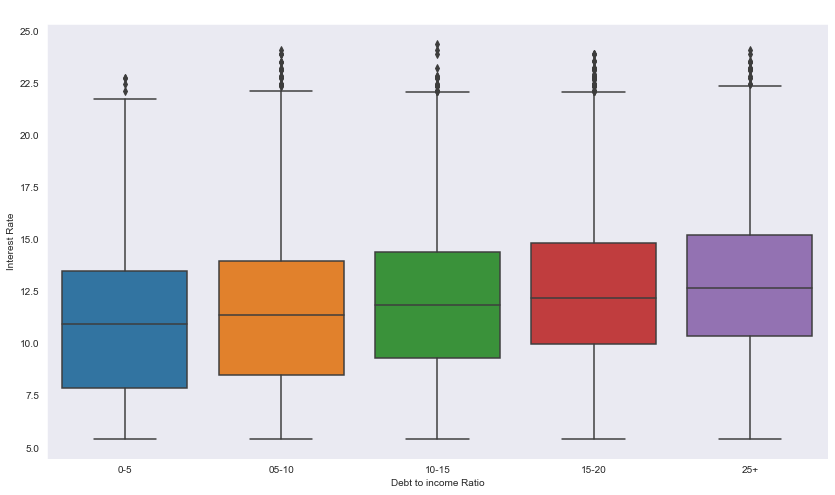

In [125]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(y='int_rate', x='dti_category', data =loan_dataset)
ax.set_title('Debt to income Ratio vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Debt to income Ratio')
plt.show()

### Observation:
* DTI increases with the interest rate, but there is no significant change found.

### Analysis of Recovery with Annual Income:

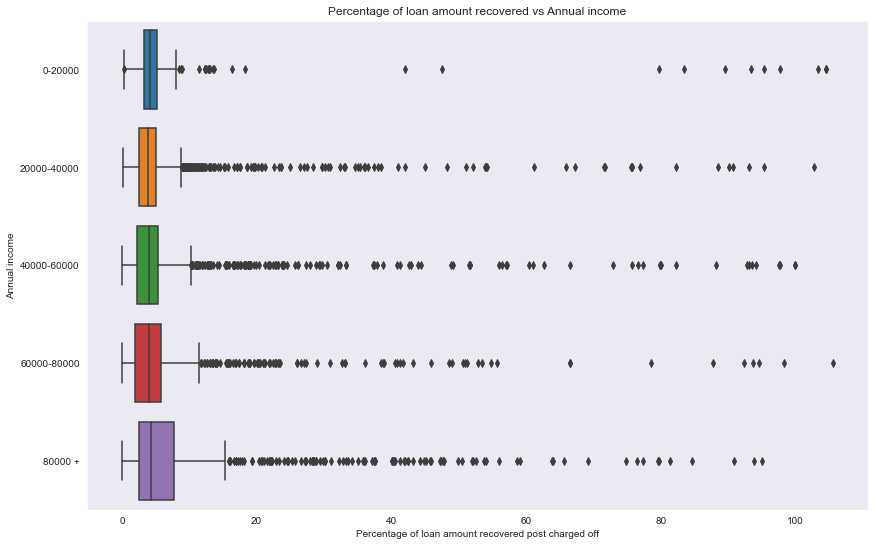

In [128]:
# Converting the Column of "Recoveries" to numerical type
loan_dataset['recoveries']=pd.to_numeric(loan_dataset['recoveries'],errors='coerce')
# Considering only recoveries more than 0.00 value
recoveries_loan =loan_dataset[loan_dataset['recoveries'] > 0.00]

# calculate recovery percentage 
recoveries_loan['recovery_prcnt']=((recoveries_loan['recoveries']/recoveries_loan['loan_amnt']) * 100) 

# plot
plt.figure(figsize=(14,9))
plot = sns.boxplot(x='recovery_prcnt',y='annual_inc_cats',data=recoveries_loan)
plot.set_title('Percentage of loan amount recovered vs Annual income')
plot.set_ylabel('Annual income')
plot.set_xlabel('Percentage of loan amount recovered post charged off')
plt.show()

### Observation:
* Higher percentage of loan amount is recovered when annual income is high.

### Analyzing Grade vs Interest rate:


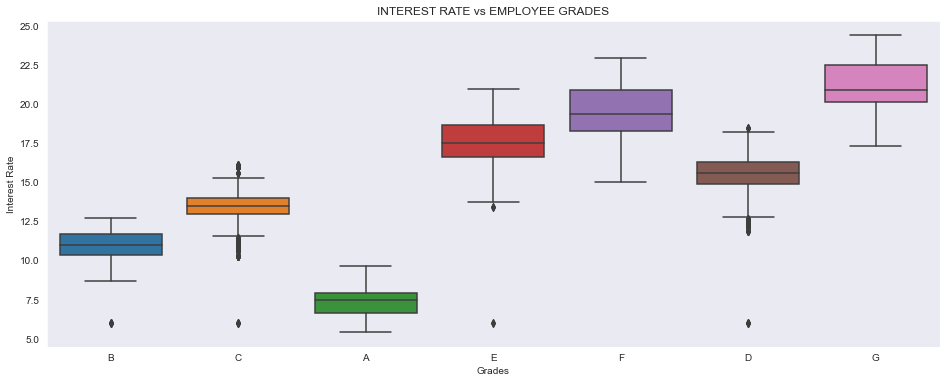

In [129]:
plt.figure(figsize=(16,6))
plot=sns.boxplot(x='grade',y='int_rate',data=loan_dataset,)
plot.set(xlabel='Grades', ylabel='Interest Rate',title='INTEREST RATE vs EMPLOYEE GRADES')
plt.show()

### Observations:
* From the above plot it has been visualize that based on grade interest rate is going higher 
* “A” is having minimum interest rate, whereas “G” is having higher interest rate.

### Risk Analysis based on Defaulter's percentage:

In [133]:
# Finding the Defaulters list - whose loan_status is charged off
defaulters=loan_dataset.loc[loan_dataset['loan_status']=='Charged Off']
defaulters.head()


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,pub_rec_bankruptcies,year,month,loan_amnt_cats,annual_inc_cats,int_rate_cats,dti_cats,loan_amnt_category,annual_inc_category,int_rate_category,dti_category
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,0,1,INDIVIDUAL,0,2011,12,0-7000,20000-40000,12.5-16,0-5,0-7000,20000-40000,12.5-16,0-5
8,1071795,5600,5600,5600.0,60 months,21.28,152.39,F,F2,4,OWN,40000.0,Source Verified,2011-12-01,Charged Off,n,small_business,Expand Business & Buy Debt Portfolio,CA,5.55,0,Apr-04,2,11,0,5210,32.60,13,f,0,0,646.02,646.02,162.02,294.94,0,189.06,2.09,Apr-12,152.39,Aug-12,0,1,INDIVIDUAL,0,2011,12,0-7000,20000-40000,NaN,05-10,0-7000,20000-40000,NaN,05-10
9,1071570,5375,5375,5350.0,60 months,12.69,121.45,B,B5,1,RENT,15000.0,Verified,2011-12-01,Charged Off,n,other,Building my credit history.,TX,18.08,0,Sep-04,0,2,0,9279,36.50,3,f,0,0,1476.19,1469.34,673.48,533.42,0,269.29,2.52,Nov-12,121.45,Mar-13,0,1,INDIVIDUAL,0,2011,12,0-7000,0-20000,12.5-16,15-20,0-7000,0-20000,12.5-16,15-20
12,1064687,9000,9000,9000.0,36 months,13.49,305.38,C,C1,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,debt_consolidation,freedom,VA,10.08,0,Apr-04,1,4,0,10452,91.70,9,f,0,0,2270.70,2270.7,1256.14,570.26,0,444.30,4.16,Jul-12,305.38,Nov-12,0,1,INDIVIDUAL,0,2011,12,7000-14000,20000-40000,12.5-16,10-15,7000-14000,20000-40000,12.5-16,10-15
14,1069057,10000,10000,10000.0,36 months,10.65,325.74,B,B2,3,RENT,100000.0,Source Verified,2011-12-01,Charged Off,n,other,Other Loan,CA,7.06,0,May-91,2,14,0,11997,55.50,29,f,0,0,7471.99,7471.99,5433.47,1393.42,0,645.10,6.3145,Oct-13,325.74,Mar-14,0,1,INDIVIDUAL,0,2011,12,7000-14000,80000 +,10-13,05-10,7000-14000,80000 +,10-13,05-10


In [134]:
#calculate the percentage of loan defaulters according to grade
grade_df=pd.DataFrame(data=round((100*defaulters['grade'].value_counts())/loan_dataset['grade'].value_counts(),2))
grade_df.rename(columns={'grade':'defaulter_perc'},inplace=True)
grade_df

,defaulter_perc
A,5.81
B,11.94
C,16.90
D,21.92
E,26.83
F,32.66
G,34.03


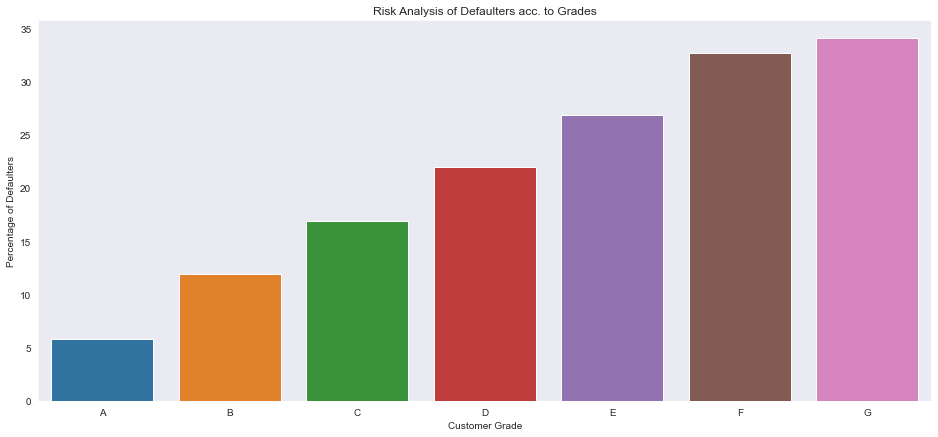

In [135]:
plt.figure(figsize=(16,7))
plot=sns.barplot(x=grade_df.index,y='defaulter_perc',data=grade_df)
plot.set(xlabel='Customer Grade', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters acc. to Grades')
plt.show()

### Observation:
* Grade G has highest percentage of Defaulters (~ 34%).
* Grade A has the least percentage of Defaulters (~ 6%).
* Grade G loan has highest amount of risk.

### Analyzing the Default Percentage according to the term of payment of loan:

In [145]:
term_analysis=pd.DataFrame(data=round((100*defaulters['term'].value_counts())/loan_dataset['term'].value_counts(),2))
term_analysis.rename(columns={'term':'defaulter_perc'},inplace=True)
term_analysis.sort_values(by='defaulter_perc',ascending=False,inplace=True)
term_analysis

,defaulter_perc
60 months,25.23
36 months,10.88


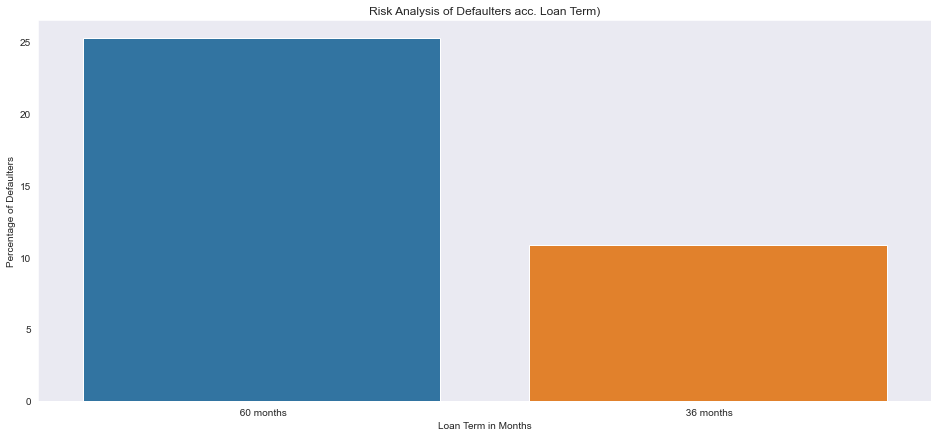

In [146]:
plt.figure(figsize=(16,7))
plot=sns.barplot(x=term_analysis.index,y='defaulter_perc',data=term_analysis)
plot.set(xlabel='Loan Term in Months', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters acc. Loan Term)')
plt.show()

### Observation:
* Percentage of Defaulters is found to be highest in 60 months term (~ 25%) and for 30 months (~ 11%).

## Multivariate Analysis:

### Correlation Matrix:

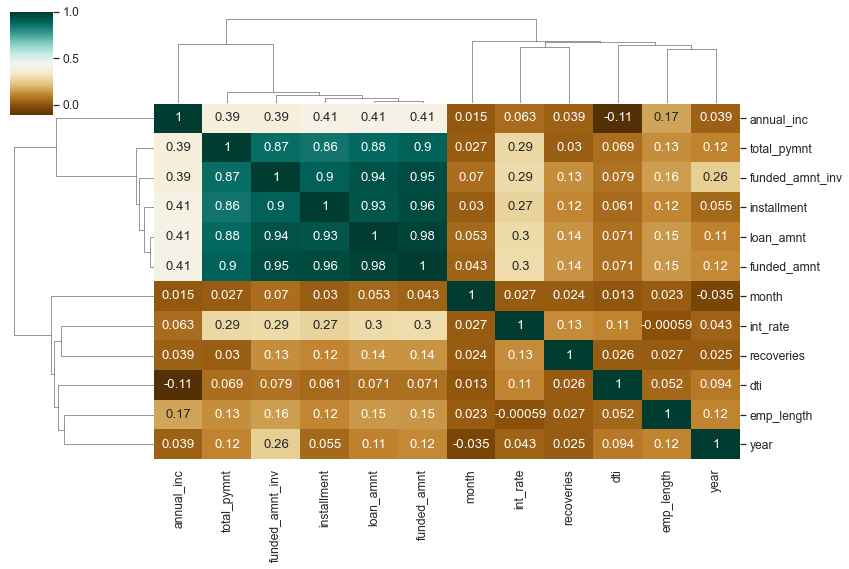

In [156]:
loan_correlation = loan_dataset.corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(12, 8),cmap="BrBG")
plt.show()

### Observations:
* The Loan amount, investor amount, funding amount are strongly correlated.
* Annual income with DTI(Debt-to-income ratio) is negatively correalted - annual income is low DTI is high & vice versa.
* Debt income ratio is the percentage of a consumer's monthly gross income that goes toward paying debts. 
* Positive correlation between annual income and employment years - income increases with work experience.

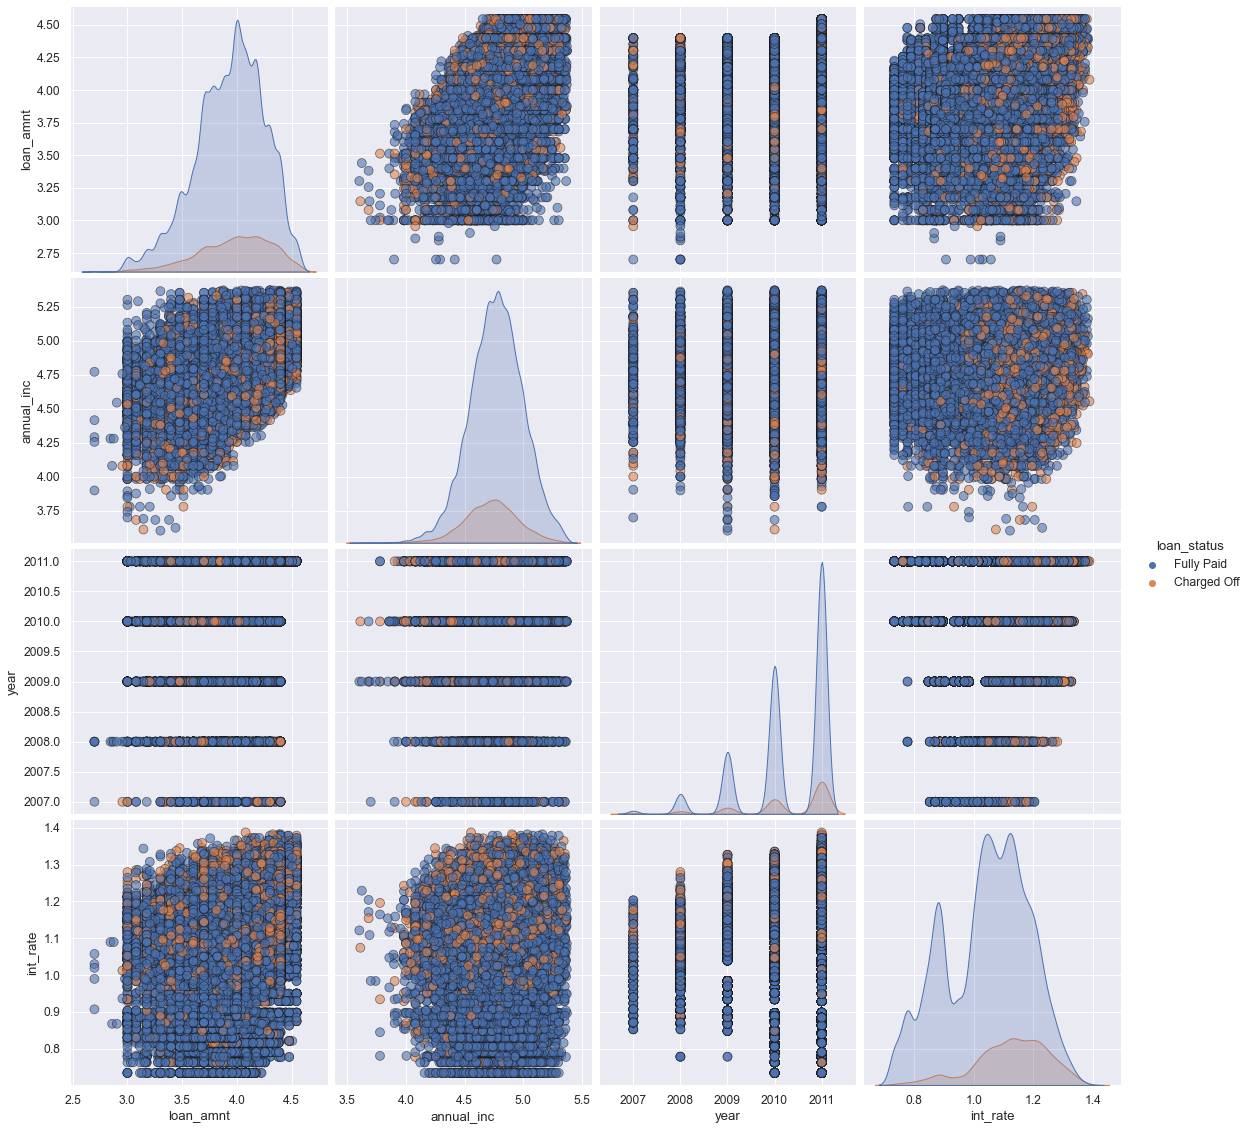

In [158]:
loan_pair = loan_dataset[['loan_amnt', 'annual_inc', 'year','int_rate','loan_status']].copy()
loan_pair.head()

# Take the log of below variables as they are heavily skewed
loan_pair['loan_amnt'] = np.log10(loan_pair['loan_amnt'])
loan_pair['annual_inc'] = np.log10(loan_pair['annual_inc'])
loan_pair['int_rate'] = np.log10(loan_pair['int_rate'])

# Create a pair plot colored by loan status with a density plot of the # diagonal and format the scatter plots.
sns.pairplot(loan_pair, hue = 'loan_status', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

### Observation:
* Higher the interest rate higher charged off ratio
* Higher the annual income higher the loan amount.
* Increase in number of charged off with increase in year.
* Interest rate is increasing as the loan amount increases.


# Summary:

* It is observed that the dataset shows 86% of Fully paid and 14% of Charged Off customers.
* Customers have lend their loans mostly for debt_consolidation(nearly 47%) and for credit_card(nearly 13%).
* Most of the borrowers are living in rented home or mortgazed their home.
* Borrowers who are not working or have less than 1 year of work experience have high chances of getting charged off.
* Small Business borrowers have high chances of getting charged off.
* Borrowers most likely to opt for 36 months term and have less chances to be defaulters/charged off compared to 60 months.
Percentage of Defaulters is found to be highest in 60 months term (~ 25%) and for 30 months (~ 11%).
* Interest rate less than 10% has very less chances of charged off.
* Grade G has highest percentage of Defaulters (~ 34%) and grade A has the least percentage of Defaulters (~ 6%).
* The Interest Rate Increases with the loan amount and higher percentage of loan amount is recovered when annual income is high.

## Recommendations for Lending Club:

* With respect to the Employment length and charged off ratio, it is observed that the many applicants under 1 year or unemployed experience charged off. So it is recommended that the lending club don't provide them with higher loan amount. It also helps applicants with lower interest rate and no charged off problems.
Lending club should carefully decide while giving loan for applicants with Public Bankruptcy Records.
* Loans for small business applicants should be reconsidered as they fall under charged off. Giving huge amount of loan with higher interest rate lead to their charged off conditions. 
* Loan has to be provided taking into consideration of annual income. This results in easy recovery without financial loss.
* Percentage of Defaulters is found to be highest in 60 months term (~ 25%) and for 30 months (~ 11%). So, giving loan amount with shorter term should be beneficial as it would not cause loss.
